<a href="https://colab.research.google.com/github/tuananh11052000/CS114.K21/blob/master/Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Khi thực hiện train với tập dữ liệu mới thì kết quả dự đoán có độ chính xác thấp hơn nhiều so với bộ dataset ban đầu. Vói tỉ lệ sai số so với kết quả trung bình là 1/880 nếu sử dụng model của round2.
2.   Lý do của sự sai số này là các điểm dữu liệu nhiễu ở bộ dataset nay nhiều hơn bộ trước đó(hình mô tả các điểm dữ liệu ở bên dưới)


3.   Lý do khiến sai số trung bình này lớn cũng bởi vì size của chương trình trong dataset sau lớn hơn nhiều so với dataset đầu


4.    Thực hiện thêm các cột là bình phương và log() của size để cải thiện độ chính xác của chương trình.






import các thư viện cần thiết

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

Tăng số lượng dữ liệu bằng cách thêm các cột là bình phương là log() độ phức tạp của chương trình.

In [0]:
time_df = pd.read_csv('round3.csv', names=["size", "time"])
size = time_df['size'].astype(float)

size_n2 = pow(size, 2)
size_log = size * np.log2(size)

time_df['size_n2'] = size_n2
time_df['size_log'] = size_log
column_names = ['size', 'size_n2', 'size_log', 'time']
pr_df = time_df.reindex(columns=column_names)

data = pr_df[['size', 'size_n2', 'size_log']].values
labels = pr_df['time'].values
print(pr_df.head(5))

       size       size_n2      size_log     time
0  37837612  1.431685e+15  9.524982e+08  4.12166
1  37395246  1.398404e+15  9.407280e+08  3.92089
2  36610827  1.340353e+15  9.198751e+08  3.21540
3  29555651  8.735365e+14  7.334805e+08  2.54506
4  25928216  6.722724e+14  6.385606e+08  2.21831


hiển thị các điểm dữ liệu chỉ vói biến size

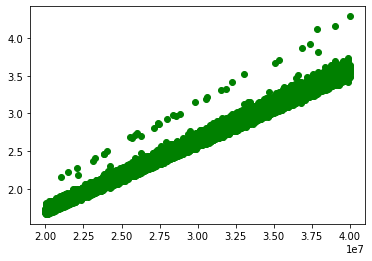

In [0]:
plt.plot(size, labels, "go");
plt.show()

Nhận thấy xuất hiện các điểm dữ liệu nhiễu nhơn dataset ban đầu

Chia dữ liệu train-test 80-20

In [0]:
# split train-test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_test[:5])

[[3.90274990e+07 1.52314568e+15 9.84194989e+08]
 [2.67671810e+07 7.16481979e+14 6.60452403e+08]
 [3.67649930e+07 1.35166471e+15 9.23971531e+08]
 [2.92873050e+07 8.57746234e+14 7.26435639e+08]
 [3.43621860e+07 1.18075983e+15 8.60233908e+08]]


Huấn luyện

In [0]:
# choose model Linearn Regression
lire = LinearRegression()
lire.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Thực hiện dự đoán

In [0]:
# Predict time
y_pred = lire.predict(X_test)
print('weight: ', lire.coef_)
print('bias: ',lire.intercept_)

weight:  [ 6.48629771e-07  6.67355823e-16 -2.26893927e-08]
bias:  -0.5125548242929181


Đánh giá model

In [0]:
# Print test error
print('Mean squared error: %f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %f' % r2_score(y_test, y_pred))

Mean squared error: 0.002978
Coefficient of determination: 0.989765


In [0]:
sum = 0
for i in y_test:
  sum = sum + i
print(sum/len(y_test))

2.630421501416432


Sau khi thêm vào dataset các cột bình phương và log() của size thì kết quả chỉ cải thiện được chút ít.
 

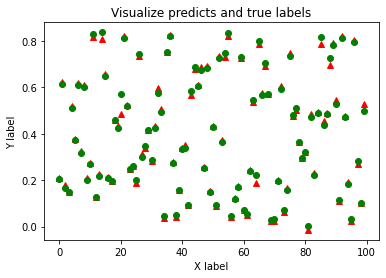

In [0]:
# Visualize pred vs true-labels
plt.plot(np.arange(0, 100), y_pred[:100], 'r^', np.arange(0, 100), y_test[:100], 'go')
plt.title('Visualize predicts and true labels')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()